<a href="https://colab.research.google.com/github/Alister03USA/Image-Processing/blob/main/DSPG_Image_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

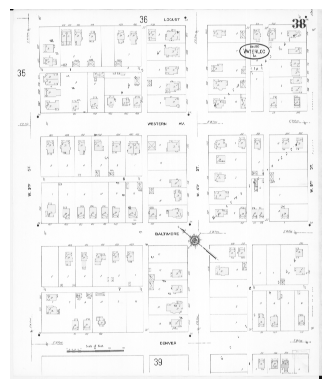

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature


# Load the image
image_path = "/content/sample_data/image_0038.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)


def show_image(image):
  """
  This function displays an image using matplotlib.

  Args:
      image: The image to be displayed.
  """
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()

show_image(gray_image)

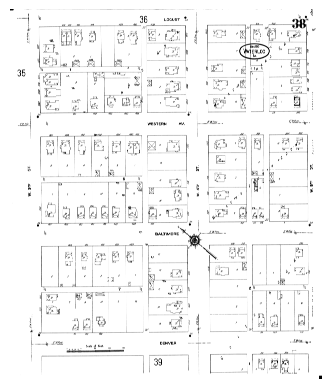

In [124]:
#Edge detection using Canny
from skimage.feature import canny
from skimage.filters import gaussian, threshold_otsu
from skimage import morphology


#Perform gaussian filtering - reduce constrast
gaussian_image = gaussian(gray_image)

# Apply thresholding
thresh = threshold_otsu(gaussian_image)
binary_image = gaussian_image > thresh

#Apply Canny edge detection
canny_edges = canny(binary_image, sigma  = 2.0)

#Display the results
#show_image(gaussian_image)
show_image(binary_image)
#show_image(canny_edges)

# Extract Buildings from the image

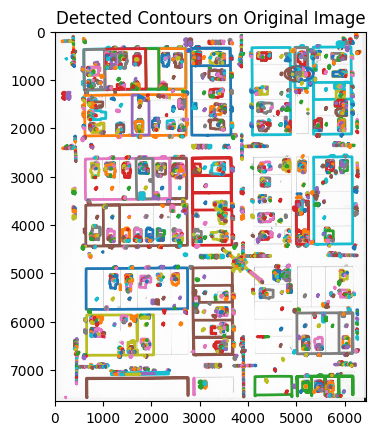

In [142]:
from skimage import io, color, filters, feature, measure, morphology, exposure
import matplotlib.pyplot as plt
import numpy as np


# Dilation
dilated_image = morphology.binary_dilation(canny_edges)

# Find contours
contours = measure.find_contours(dilated_image, 0.8)

# Calculate the area of each contour
contour_areas = [measure.regionprops(morphology.label(np.array([contour])))[0].area for contour in contours]

# Define a minimum area threshold to filter small contours (lowering the threshold)
min_area = 3 # Lowering the threshold to capture more buildings

# Filter contours based on the minimum area
filtered_contours = [contour for contour, area in zip(contours, contour_areas) if area > min_area]

# Create an empty image to store the buildings
buildings_image = np.zeros_like(gray_image)

# Draw the filtered contours (buildings) on the empty image
for contour in filtered_contours:
    rr, cc = contour[:, 0].astype(int), contour[:, 1].astype(int)
    buildings_image[rr, cc] = 1

# Adjust the thickness of the line
thick_buildings_image = morphology.binary_dilation(buildings_image, morphology.disk(6))

# Display the original image with contours overlaid
fig, ax = plt.subplots()
ax.imshow(gray_image, cmap='gray')

for contour in filtered_contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.set_title('Detected Contours on Original Image')
plt.show()




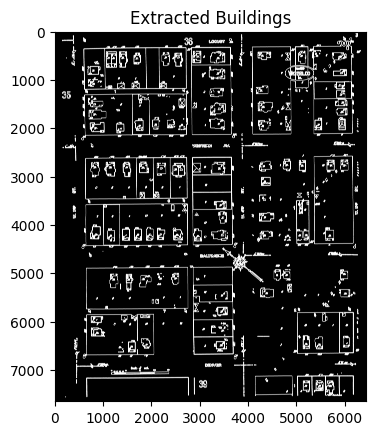

In [143]:
# # Display the extracted buildings
plt.imshow(thick_buildings_image, cmap='gray')
plt.title('Extracted Buildings')
plt.show()

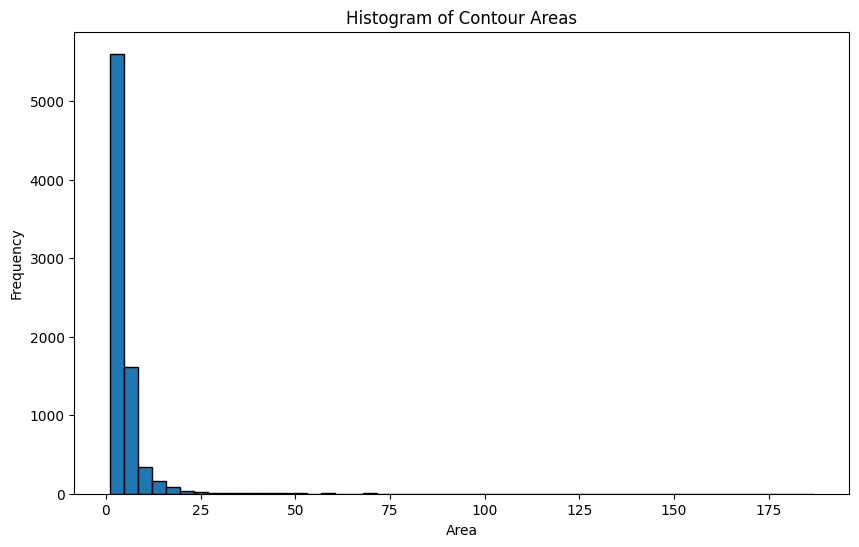

In [134]:
#Plot the histogram of contour areas
plt.figure(figsize=(10, 6))
plt.hist(contour_areas, bins=50, edgecolor='black')
plt.title('Histogram of Contour Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

In [103]:
canny_edges.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

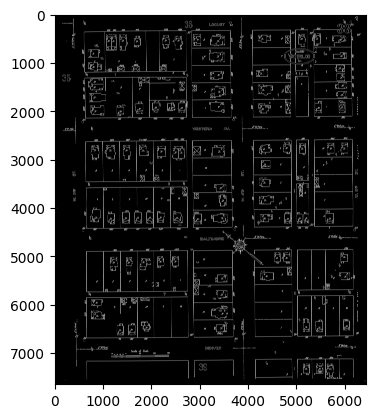

In [140]:
plt.imshow(dilated_image, cmap='gray')
plt.show()